<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf


In [4]:
bunch = load_breast_cancer()
bunch

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
data = bunch.data
target = bunch.target

In [7]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
print(bunch.target_names)
print(bunch.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
print(bunch.data.shape)
print(bunch.target.shape)

(569, 30)
(569,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

In [13]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)


1.0

In [14]:
model.score(X_test, y_test)

0.9707602339181286

In [15]:
sum(model.predict(X_test)==y_test) / len(X_test)

0.9707602339181286

In [16]:
#let's prep for a NN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
modelNN = MLPClassifier()
modelNN.fit(X_train_scaled, y_train)
modelNN.score(X_train_scaled, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9899497487437185

In [19]:
modelNN.score(X_test_scaled, y_test)

0.9824561403508771

In [22]:
# let's do a TF NN
X_train_scaled.shape

(398, 30)

In [26]:
modelTF = tf.keras.models.Sequential()
modelTF.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1], )))

In [27]:
modelTF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
#let's redo the split with 20% test and 16% validation
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.20)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
idx = int(len(X_train_scaled) * 0.2)
print('val set size = ' + str(idx))
X_val_scaled = X_train_scaled[-idx:]
y_val = y_train[-idx:]
X_train_scaled = X_train_scaled[:-idx]
y_train = y_train[:-idx]
result = modelTF.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

val set size = 91
Epoch 1/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0726 - accuracy: 0.9863 - val_loss: 0.1020 - val_accuracy: 0.9890
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9863 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9863 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9863 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0717 - accuracy: 0.9863 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0715 - accuracy: 0.9863 - val_loss: 0.1018 - val_accuracy: 0.9890
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9863 - val_loss: 0.1018 - val_accuracy: 0.

In [49]:
modelTF.evaluate(X_train_scaled, y_train)

12/12 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9863


[0.057642947882413864, 0.9862637519836426]

In [50]:
modelTF.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9649


[0.054049089550971985, 0.9649122953414917]

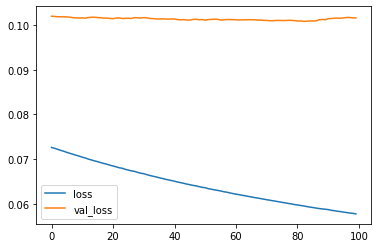

In [55]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()



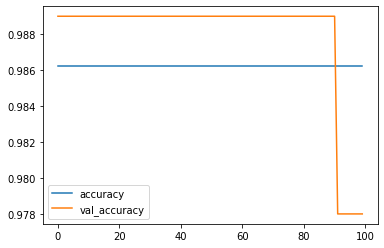

In [54]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()